In [2]:
import sys
sys.path.append('C:/Users/mesfi/OneDrive/Desktop/han AAU Training/10Acadamy/week1/Week-1-Analytics_in_telecommunication')
import pandas as pd
from scripts.process_data import get_df
from scripts.postgres_connection import connect_to_postgres 

import numpy as np
import seaborn as sns
# pd.set_option('display.float_format', lambda x: '%.0f' % x)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
df = get_df()

In [4]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [5]:
#Start by identifying the top 10 handsets used by the customers
Handset_counts = df['Handset Type'].value_counts()
Handset_counts = Handset_counts .reset_index()
Handset_counts.columns = ['Handset Type', 'Count']
Handset_counts.head(10)

,Handset Type,Count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


In [6]:
#identify the top 3 handset manufacturers
manufacturers_counts = df['Handset Manufacturer'].value_counts()
manufacturers_counts = manufacturers_counts .reset_index()
manufacturers_counts.columns = ['top 3 handset manufacturers', 'Count']
manufacturers_counts.head(3)

,top 3 handset manufacturers,Count
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


In [7]:
 #identify the top 5 handsets per top 3 handset manufacturer
#Intially filter the data
filtered_df = df[df['Handset Manufacturer'].isin(['Apple', 'Samsung', 'Huawei'])]
filtered_df.iloc[0]

Bearer Id                                       13114483460844900352.0
Start                                                   4/4/2019 12:01
Start ms                                                         770.0
End                                                    4/25/2019 14:35
End ms                                                           662.0
Dur. (ms)                                                    1823652.0
IMSI                                                 208201448079117.0
MSISDN/Number                                            33664962239.0
IMEI                                                  35521209507511.0
Last Location Name                               9.16456699548519E+015
Avg RTT DL (ms)                                                   42.0
Avg RTT UL (ms)                                                    5.0
Avg Bearer TP DL (kbps)                                           23.0
Avg Bearer TP UL (kbps)                                           44.0
TCP DL

In [8]:
#identify the top 5 handsets per top 3 handset manufacturer
Handset_counts = filtered_df['Handset Type'].value_counts()
Handset_counts = Handset_counts .reset_index()
Handset_counts.columns = ['top 5 handsets', 'Count']
Handset_counts.head(5)

,top 5 handsets,Count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,Apple iPhone 7 (A1778),6326
4,Apple iPhone Se (A1723),5187


In [9]:
#Aggregate per user the following information in the column  
#number of xDR sessions,Session duration,the total download (DL) and upload (UL) data,the total data volume (in Bytes) during this session for each application

df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

df['Session Duration (s)'] = (df['End'] - df['Start']).dt.total_seconds()

applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

user_aggregated = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count', 
    'Session Duration (s)': 'sum', 
    'Total DL (Bytes)': 'sum', 
    'Total UL (Bytes)': 'sum',  
    **{f'{app} DL (Bytes)': 'sum' for app in applications}, 
    **{f'{app} UL (Bytes)': 'sum' for app in applications}  
})

for app in applications:
    user_aggregated[f'{app} (Total Bytes)'] = user_aggregated[f'{app} DL (Bytes)'] + user_aggregated[f'{app} UL (Bytes)']
    user_aggregated.drop([f'{app} DL (Bytes)', f'{app} UL (Bytes)'], axis=1, inplace=True)

user_aggregated.rename(columns={'Bearer Id': 'Number of xDR sessions'}, inplace=True)

user_aggregated.head()

,Number of xDR sessions,Session Duration (s),Total DL (Bytes),Total UL (Bytes),Social Media (Total Bytes),Google (Total Bytes),Email (Total Bytes),Youtube (Total Bytes),Netflix (Total Bytes),Gaming (Total Bytes),Other (Total Bytes)
MSISDN/Number,,,,,,,,,,,
3.360100e+10,1,116760.0,8.426375e+08,36053108.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
3.360100e+10,1,181260.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
3.360100e+10,1,135000.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3.360101e+10,1,49920.0,4.019932e+08,20327526.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
3.360101e+10,2,37200.0,1.363130e+09,94280527.0,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [10]:
missing_values_count = df.isnull().sum()
missing_values_count

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [11]:
#Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

non_numeric_columns = df.select_dtypes(exclude=['number']).columns

df_numeric = df.drop(non_numeric_columns, axis=1)

cleaned_data = df_numeric.fillna(df_numeric.mean())
cleaned_data.head()


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Duration (s)
0,1.311448e+19,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.0,...,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1823640.0
1,1.311448e+19,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.0,...,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1365060.0
2,1.311448e+19,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,109.795706,17.662883,6.0,...,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1361760.0
3,1.311448e+19,486.0,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,109.795706,17.662883,44.0,...,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,1321500.0
4,1.311448e+19,565.0,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,109.795706,17.662883,6.0,...,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,1089000.0


In [12]:
#Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
selected_columns = [
    "Dur. (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)"
]

# Create a new DataFrame with selected columns
displayed_data = cleaned_data[selected_columns]

# Display the new DataFrame
displayed_data.describe()


,Dur. (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Other DL (Bytes),Other UL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.046086e+05,13300.045927,1770.428647,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.112121e+07,4.546434e+08,4.211005e+08,8.264799e+06
std,8.103735e+04,23971.798635,4625.340082,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,1.127635e+07,2.441421e+08,2.432050e+08,4.769004e+06
min,7.142000e+03,0.000000,0.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,2.866892e+06,7.114041e+06,3.290000e+03,1.480000e+02
25%,5.744200e+04,43.000000,47.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,3.322203e+07,2.431072e+08,2.101869e+08,4.145943e+06
50%,8.639900e+04,63.000000,63.000000,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.114324e+07,4.558409e+08,4.218030e+08,8.267071e+06
75%,1.324300e+05,19710.000000,1120.000000,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,4.903424e+07,6.657051e+08,6.316918e+08,1.238415e+07
max,1.859336e+06,378160.000000,58613.000000,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,7.833131e+07,9.029696e+08,8.434425e+08,1.655882e+07


In [13]:

#Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation.

quantitative_columns = displayed_data.select_dtypes(include=['number']).columns

dispersion_data = pd.DataFrame(index=quantitative_columns, columns=['Range', 'Variance', 'Standard Deviation', 'IQR'])

for column in quantitative_columns:
    data = displayed_data[column].dropna() 
   
    data_range = data.max() - data.min()
    
    data_variance = data.var()
    
    data_std_dev = data.std()
    
    # Interquartile Range (IQR)
    data_iqr = data.quantile(0.75) - data.quantile(0.25)
    
    # Store values in the DataFrame
    dispersion_data.loc[column] = [data_range, data_variance, data_std_dev, data_iqr]

dispersion_data

,Range,Variance,Standard Deviation,IQR
Dur. (ms),1852194.0,6567052314.333346,81037.351353,74988.0
Avg Bearer TP DL (kbps),378160.0,574647129.800257,23971.798635,19667.0
Avg Bearer TP UL (kbps),58613.0,21393770.878509,4625.340082,1073.0
Social Media DL (Bytes),3586052.0,1072223543812.80957,1035482.275953,1795790.0
Social Media UL (Bytes),65870.0,361234811.906947,19006.178256,32886.0
Google DL (Bytes),11462625.0,10950123070358.3125,3309097.017369,5741159.0
Google UL (Bytes),4121354.0,1415902290791.050781,1189916.926004,2064175.0
Email DL (Bytes),3586132.0,1072963491174.825195,1035839.510337,1796534.0
Email UL (Bytes),936416.0,72883426738.810303,269969.307031,467057.0
Youtube DL (Bytes),23259045.0,45031734293136.367188,6710568.85019,11615017.0


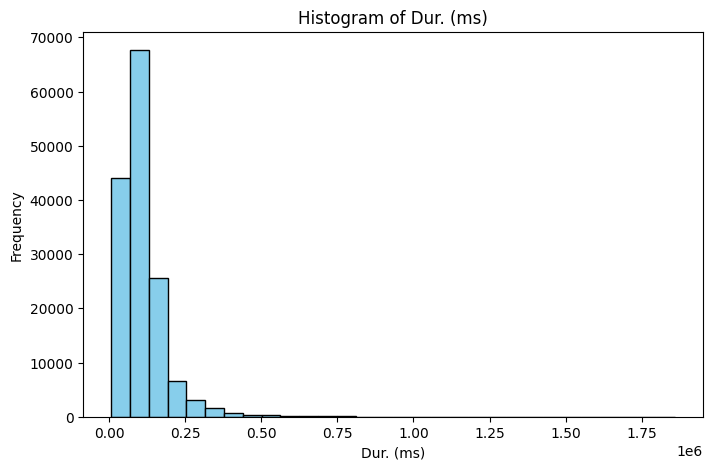

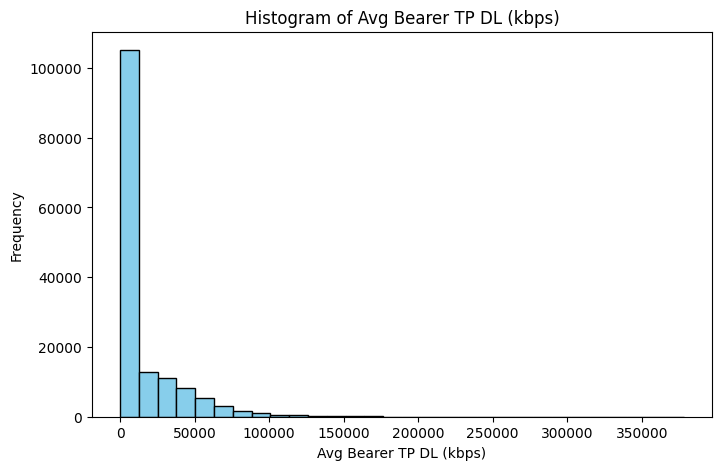

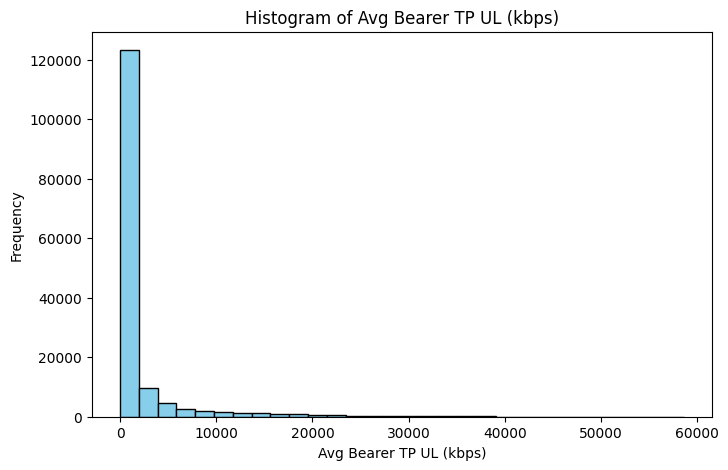

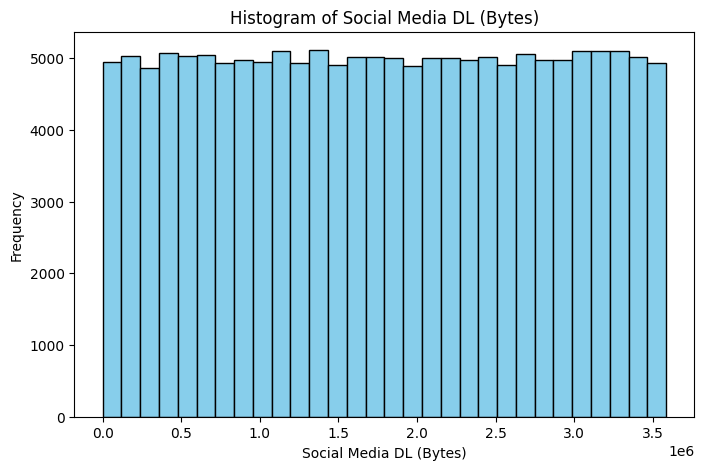

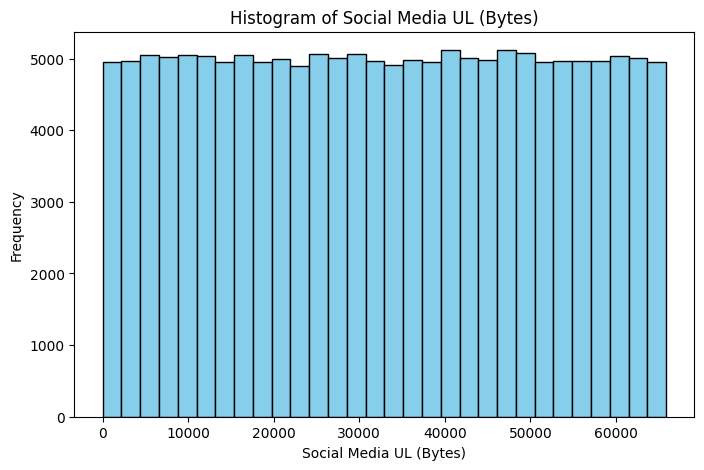

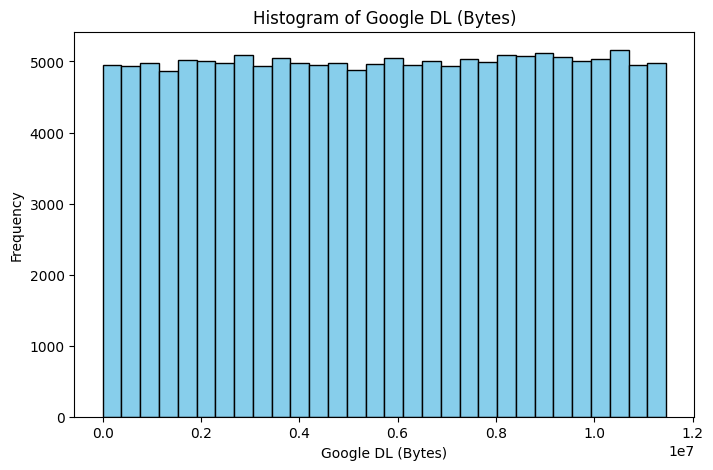

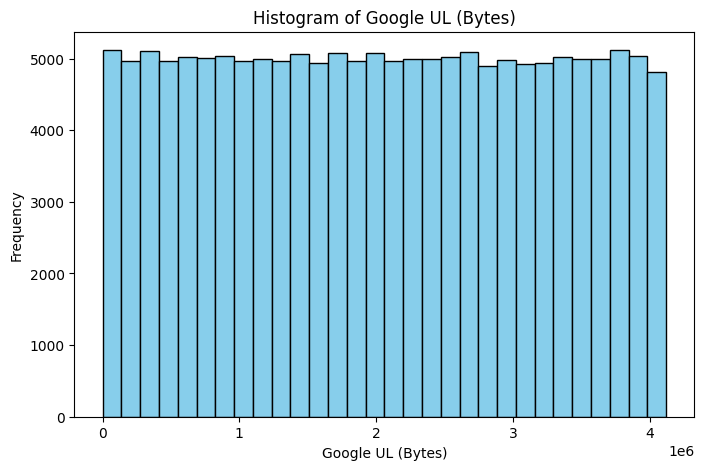

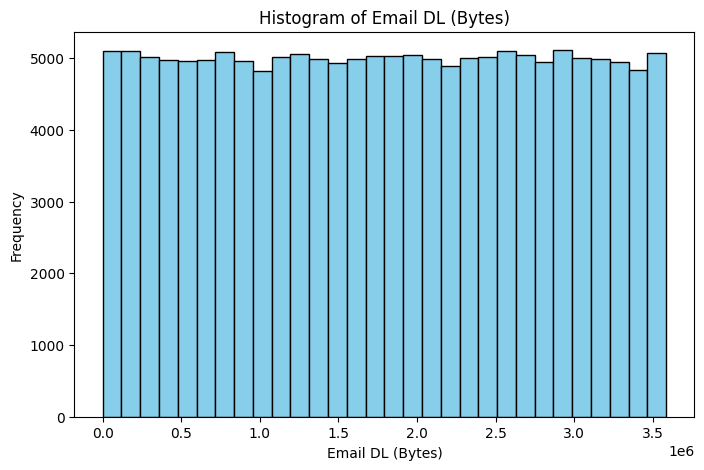

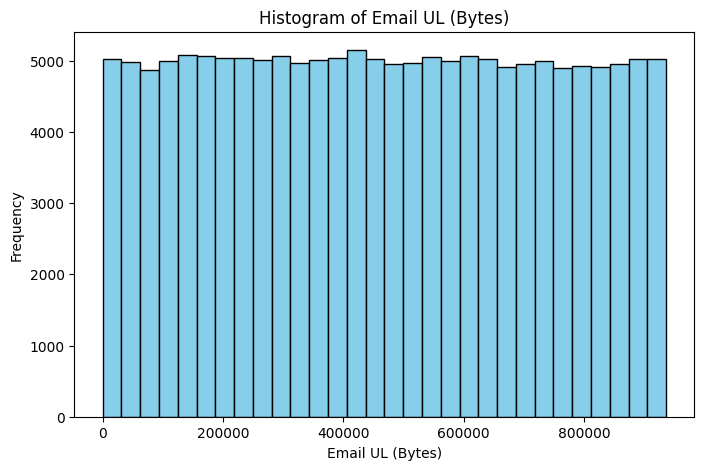

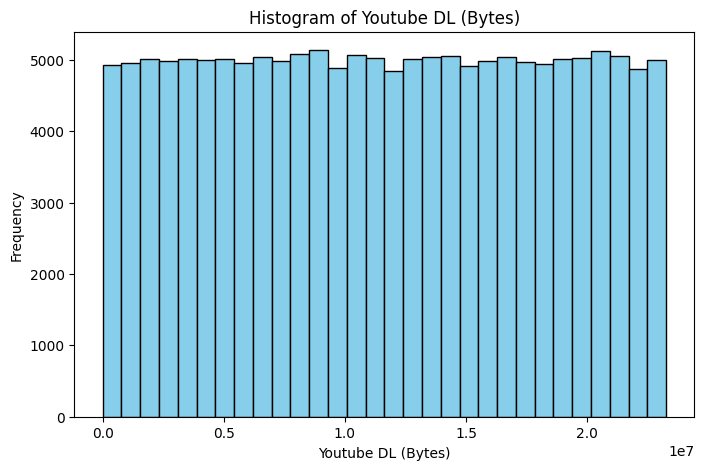

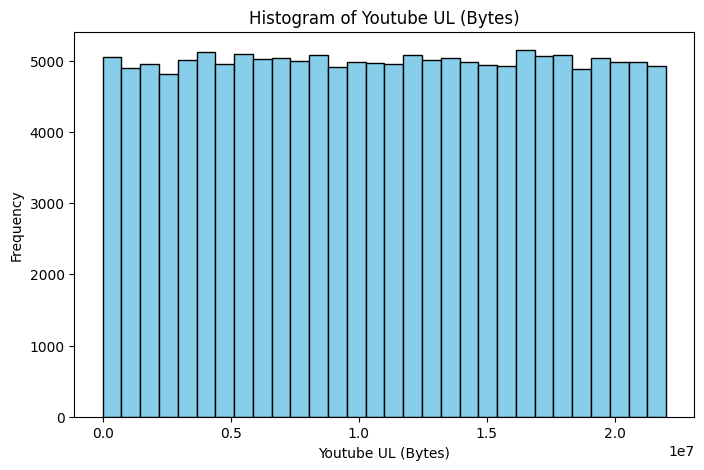

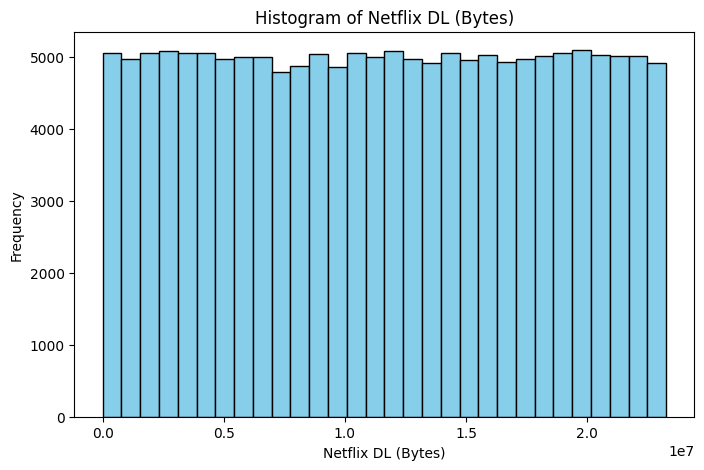

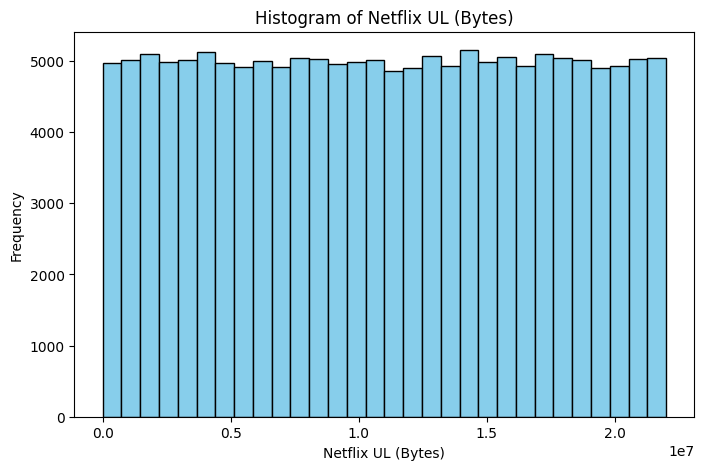

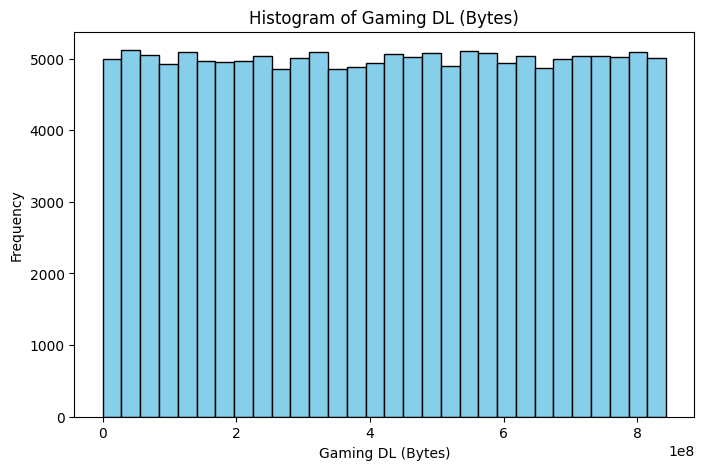

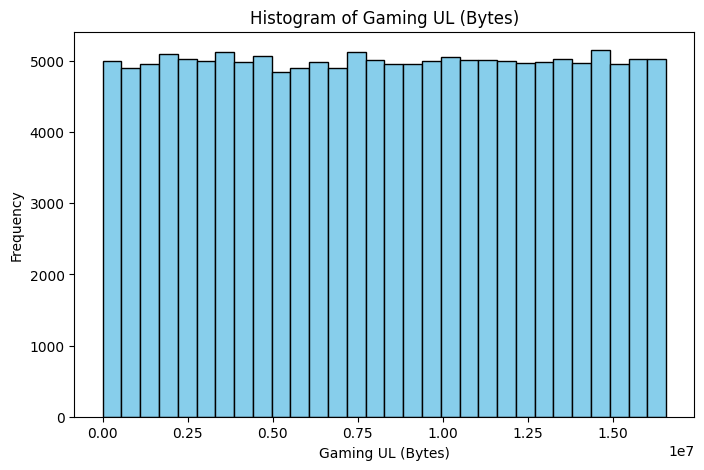

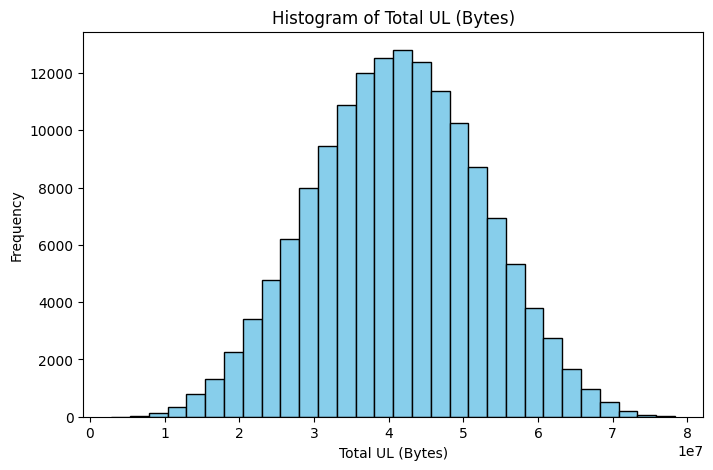

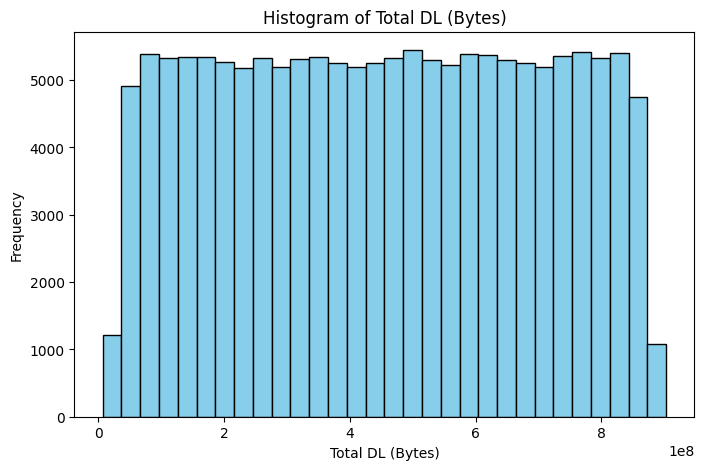

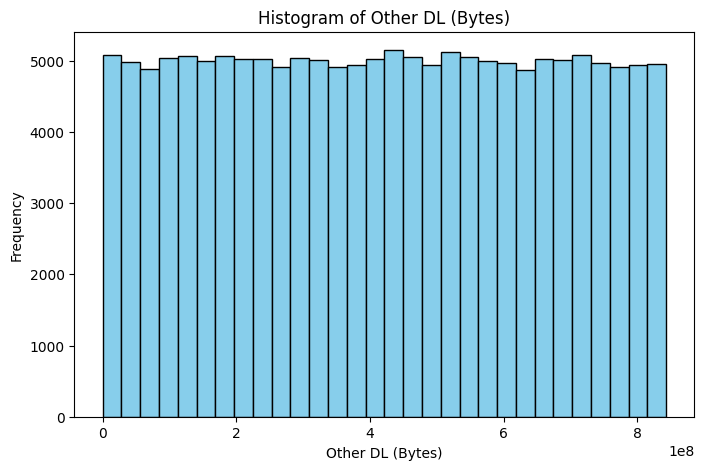

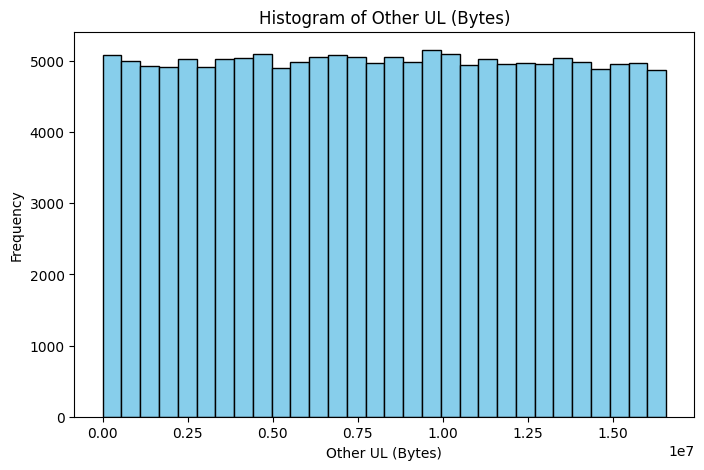

In [14]:
#Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.
import matplotlib.pyplot as plt 

numeric_columns = displayed_data.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

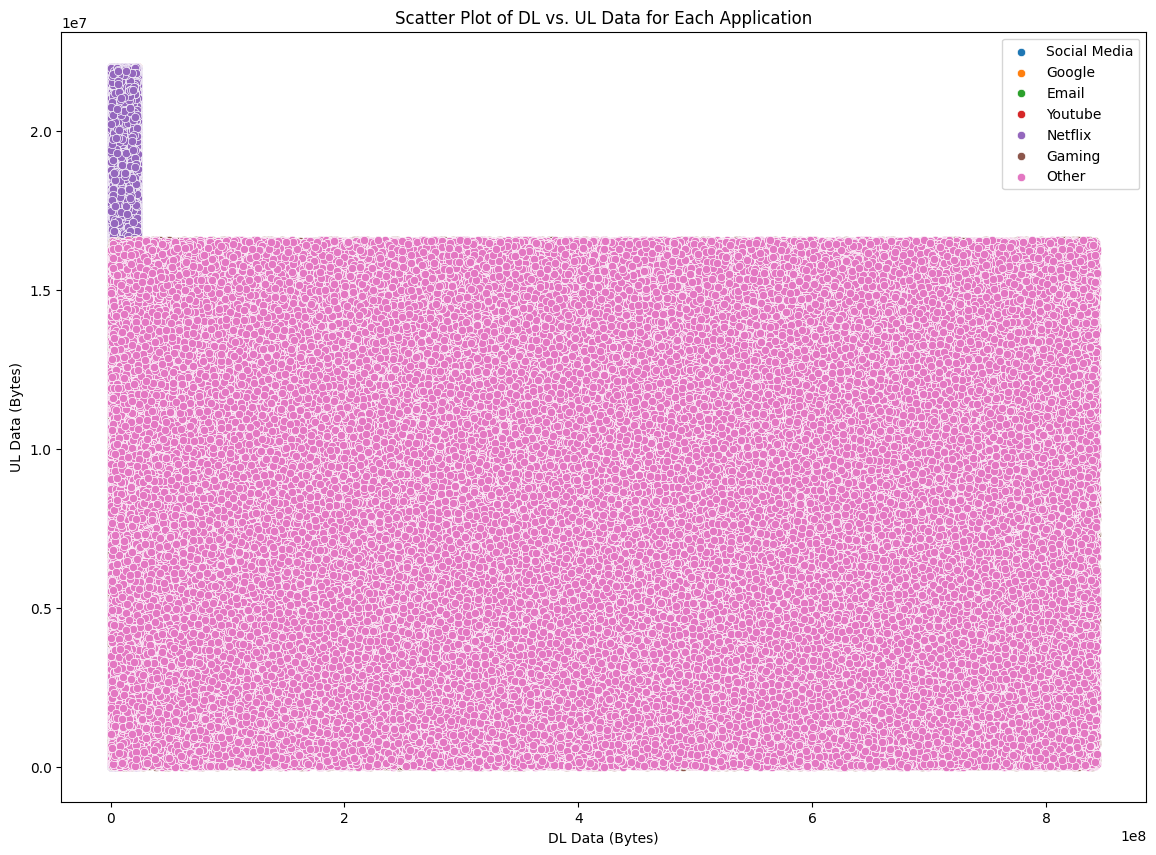

In [15]:
#Bivariate Analysis; explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 
import seaborn as sns
import matplotlib.pyplot as plt

# List of applications
applications = [
    'Social Media',
    'Google',
    'Email',
    'Youtube',
    'Netflix',
    'Gaming',
    'Other',
]

# Calculate total DL+UL data
cleaned_data['Total Data (DL+UL)'] = cleaned_data['Total UL (Bytes)'] + cleaned_data['Total DL (Bytes)']

# Create scatter plots for each application vs. Total Data (DL+UL)
plt.figure(figsize=(14, 10))
for app in applications:
    sns.scatterplot(x=cleaned_data[app + ' DL (Bytes)'], y=cleaned_data[app + ' UL (Bytes)'], label=app)

plt.xlabel('DL Data (Bytes)')
plt.ylabel('UL Data (Bytes)')
plt.title('Scatter Plot of DL vs. UL Data for Each Application')
plt.legend()
plt.show()

In [16]:
#Variable transformations  
#Convert 'Start' and 'End' columns to datetime format for better handling

df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate Session Duration in seconds
df['Session Duration (s)'] = (df['End'] - df['Start']).dt.total_seconds()

# Calculate total DL+UL data
df['Total Data (DL+UL)'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Group users into deciles based on total session duration
df['Duration Decile'] = pd.qcut(df.groupby('MSISDN/Number')['Session Duration (s)'].transform('sum'), q=10, labels=False, duplicates='drop')

# Group by duration decile and compute total data per decile
decile_data = df.groupby('Duration Decile')['Total Data (DL+UL)'].sum().reset_index()

# Sort deciles by total data in descending order
decile_data = decile_data.sort_values(by='Total Data (DL+UL)', ascending=False)

# Display the total data per decile
print(decile_data)

   Duration Decile  Total Data (DL+UL)
2              2.0        9.470594e+12
5              5.0        9.182179e+12
0              0.0        7.387807e+12
4              4.0        7.387649e+12
7              7.0        7.385689e+12
1              1.0        7.378985e+12
8              8.0        7.363295e+12
9              9.0        7.355558e+12
6              6.0        5.591480e+12
3              3.0        5.330211e+12


In [17]:
# Convert 'Start' and 'End' columns to datetime format for better handling

df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate Session Duration in seconds
df['Session Duration (s)'] = (df['End'] - df['Start']).dt.total_seconds()

# Calculate total DL+UL data
df['Total Data (DL+UL)'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Group users into deciles based on total session duration
df['Duration Decile'] = pd.qcut(df.groupby('MSISDN/Number')['Session Duration (s)'].transform('sum'), q=10, labels=False, duplicates='drop')

# Group by duration decile and compute total data per decile
decile_data = df.groupby('Duration Decile')['Total Data (DL+UL)'].sum().reset_index()

# Sort deciles by total data in descending order
decile_data = decile_data.sort_values(by='Total Data (DL+UL)', ascending=False)

# Display the total data per decile
print(decile_data)

   Duration Decile  Total Data (DL+UL)
2              2.0        9.470594e+12
5              5.0        9.182179e+12
0              0.0        7.387807e+12
4              4.0        7.387649e+12
7              7.0        7.385689e+12
1              1.0        7.378985e+12
8              8.0        7.363295e+12
9              9.0        7.355558e+12
6              6.0        5.591480e+12
3              3.0        5.330211e+12


In [18]:

# List of columns for correlation analysis
columns_of_interest = [
    'Social Media DL (Bytes)',
    'Google DL (Bytes)',
    'Email DL (Bytes)',
    'Youtube DL (Bytes)',
    'Netflix DL (Bytes)',
    'Gaming DL (Bytes)',
    'Other DL (Bytes)',
    'Social Media UL (Bytes)',
    'Google UL (Bytes)',
    'Email UL (Bytes)',
    'Youtube UL (Bytes)',
    'Netflix UL (Bytes)',
    'Gaming UL (Bytes)',
    'Other UL (Bytes)',
]

# Subset the DataFrame with the specified columns
correlation_data = cleaned_data[columns_of_interest]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix

correlation_matrix

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Social Media UL (Bytes),Google UL (Bytes),Email UL (Bytes),Youtube UL (Bytes),Netflix UL (Bytes),Gaming UL (Bytes),Other UL (Bytes)
Social Media DL (Bytes),1.000000,-0.001954,0.004745,-0.001389,-0.001817,0.001018,0.006126,-0.000555,0.000186,-0.002518,0.002345,0.003457,0.003095,0.000610
Google DL (Bytes),-0.001954,1.000000,-0.000039,0.001760,0.000548,-0.001421,-0.002557,0.003542,-0.000103,0.000742,0.000638,-0.001569,-0.001429,-0.000882
Email DL (Bytes),0.004745,-0.000039,1.000000,0.001679,0.001351,0.000050,-0.000444,0.004823,-0.001157,0.002553,-0.004305,-0.000016,-0.004335,0.004675
Youtube DL (Bytes),-0.001389,0.001760,0.001679,1.000000,0.001202,-0.001861,0.002042,-0.001786,0.001122,-0.000320,0.002433,0.001746,-0.001893,-0.004830
Netflix DL (Bytes),-0.001817,0.000548,0.001351,0.001202,1.000000,-0.003201,-0.006000,-0.000772,-0.001288,-0.000011,0.000423,0.001065,-0.000633,-0.002588
Gaming DL (Bytes),0.001018,-0.001421,0.000050,-0.001861,-0.003201,1.000000,-0.002591,0.000210,0.001140,-0.002519,-0.002382,-0.001051,0.001162,-0.001131
Other DL (Bytes),0.006126,-0.002557,-0.000444,0.002042,-0.006000,-0.002591,1.000000,-0.003850,0.002097,-0.003805,0.002296,-0.006691,-0.002381,0.003421
Social Media UL (Bytes),-0.000555,0.003542,0.004823,-0.001786,-0.000772,0.000210,-0.003850,1.000000,0.001085,-0.001427,-0.002368,-0.002493,0.000844,0.000971
Google UL (Bytes),0.000186,-0.000103,-0.001157,0.001122,-0.001288,0.001140,0.002097,0.001085,1.000000,-0.002050,0.001670,-0.004073,-0.002516,-0.002219
Email UL (Bytes),-0.002518,0.000742,0.002553,-0.000320,-0.000011,-0.002519,-0.003805,-0.001427,-0.002050,1.000000,-0.006834,0.000532,0.005000,0.000081


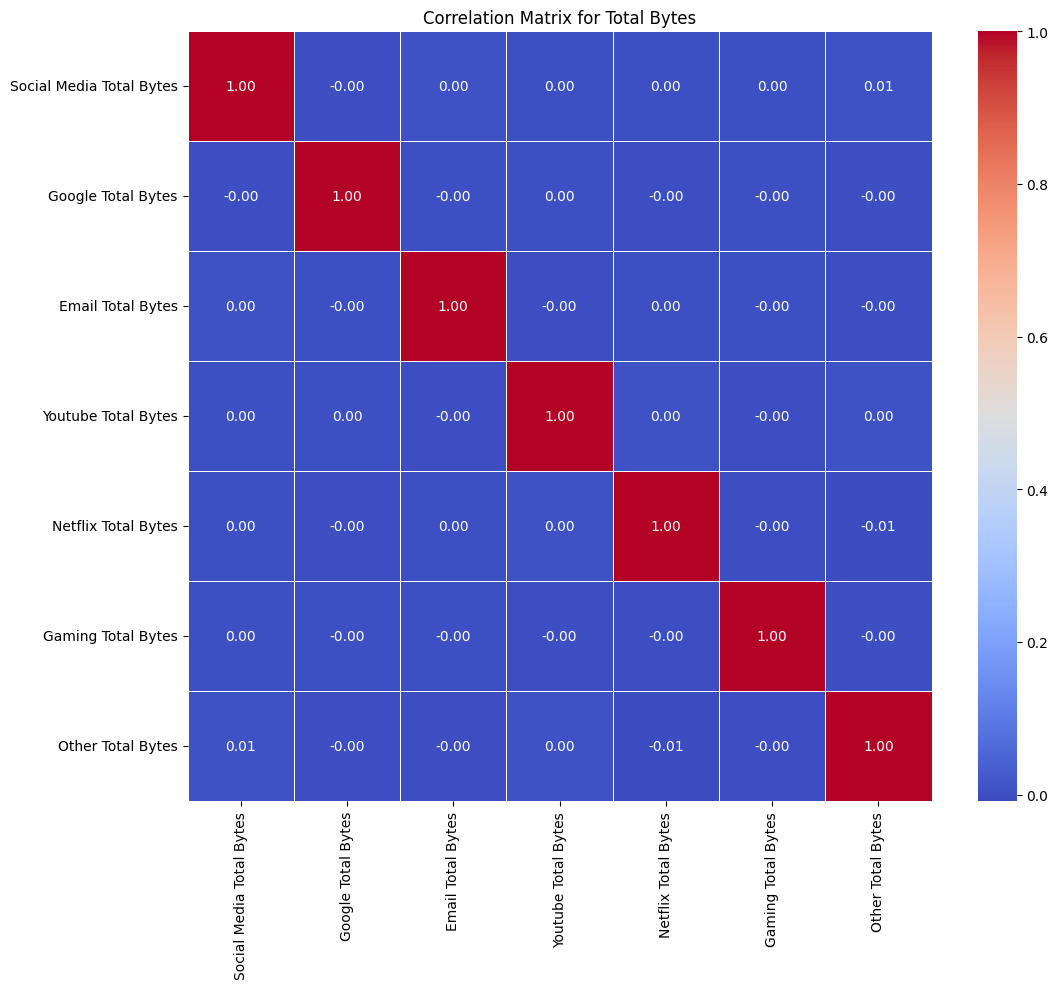

In [19]:
# Select relevant columns
app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
               'Google DL (Bytes)', 'Google UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)',
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Other DL (Bytes)', 'Other UL (Bytes)']

# Create new columns for total bytes for each application
for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other', 'Total']:
    cleaned_data[f'{app} Total Bytes'] = cleaned_data[f'{app} DL (Bytes)'] + cleaned_data[f'{app} UL (Bytes)']

# Select only the new total bytes columns
total_bytes_columns = [f'{app} Total Bytes' for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']]
total_bytes_data = cleaned_data[total_bytes_columns]

# Calculate correlation matrix for total bytes
corr_matrix_total_bytes = total_bytes_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_total_bytes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Total Bytes')
plt.show()


In [ ]:


# Select the relevant columns for PCA
all_columns_for_pca = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                       'Google DL (Bytes)', 'Google UL (Bytes)',
                       'Email DL (Bytes)', 'Email UL (Bytes)',
                       'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                       'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                       'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                       'Other DL (Bytes)', 'Other UL (Bytes)',
                       'Total DL (Bytes)', 'Total UL (Bytes)',
                       'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
                       'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
                       'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
                       'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
                       'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
                       'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B',
                       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']

# Create a subset dataframe with relevant columns
data_for_pca = cleaned_data[all_columns_for_pca]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Apply PCA
pca = PCA(10)
principal_components = pca.fit_transform(scaled_data)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

principal_components  = pd.DataFrame(principal_components)
principal_components